# Methods I: Programming and Data Analysis

## Session 12: NLTK; Classes; The random module

### Gerhard Jäger

#### (based on Johannes Dellert's slides)

January 25, 2022

### NLTK: Accessing Text Corpora

-   take a look at Chapter 2 of the book
    (<http://www.nltk.org/book/ch02.html>)

-   browse through it until you find something interesting

-   run the examples using an interactive console

-   play around with the objects, fiddle with arguments,\
    explore the possibilities!

-   suggestions:

    -   Inaugural Address Corpus

    -   Corpora in Other Languages

    -   WordNet



In [1]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [2]:
from nltk.corpus import gutenberg
gutenberg.fileids()


['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [3]:
emma = nltk.corpus.gutenberg.words('austen-emma.txt')
len(emma)

192427

In [7]:
emma = gutenberg.words('austen-emma.txt')
emma

['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', ...]

In [8]:
for fileid in gutenberg.fileids():
    num_chars = len(gutenberg.raw(fileid))
    num_words = len(gutenberg.words(fileid))
    num_sents = len(gutenberg.sents(fileid))
    num_vocab = len(set(w.lower() for w in gutenberg.words(fileid)))
    print(round(num_chars/num_words), round(num_words/num_sents), round(num_words/num_vocab), fileid)

5 25 26 austen-emma.txt
5 26 17 austen-persuasion.txt
5 28 22 austen-sense.txt
4 34 79 bible-kjv.txt
5 19 5 blake-poems.txt
4 19 14 bryant-stories.txt
4 18 12 burgess-busterbrown.txt
4 20 13 carroll-alice.txt
5 20 12 chesterton-ball.txt
5 23 11 chesterton-brown.txt
5 18 11 chesterton-thursday.txt
4 21 25 edgeworth-parents.txt
5 26 15 melville-moby_dick.txt
5 52 11 milton-paradise.txt
4 12 9 shakespeare-caesar.txt
4 12 8 shakespeare-hamlet.txt
4 12 7 shakespeare-macbeth.txt
5 36 12 whitman-leaves.txt


In [9]:
macbeth_sentences = gutenberg.sents('shakespeare-macbeth.txt')
macbeth_sentences

[['[', 'The', 'Tragedie', 'of', 'Macbeth', 'by', 'William', 'Shakespeare', '1603', ']'], ['Actus', 'Primus', '.'], ...]

In [10]:
macbeth_sentences[1116]


['Double',
 ',',
 'double',
 ',',
 'toile',
 'and',
 'trouble',
 ';',
 'Fire',
 'burne',
 ',',
 'and',
 'Cauldron',
 'bubble']

In [11]:
longest_len = max(len(s) for s in macbeth_sentences)
[s for s in macbeth_sentences if len(s) == longest_len]


[['Doubtfull',
  'it',
  'stood',
  ',',
  'As',
  'two',
  'spent',
  'Swimmers',
  ',',
  'that',
  'doe',
  'cling',
  'together',
  ',',
  'And',
  'choake',
  'their',
  'Art',
  ':',
  'The',
  'mercilesse',
  'Macdonwald',
  '(',
  'Worthie',
  'to',
  'be',
  'a',
  'Rebell',
  ',',
  'for',
  'to',
  'that',
  'The',
  'multiplying',
  'Villanies',
  'of',
  'Nature',
  'Doe',
  'swarme',
  'vpon',
  'him',
  ')',
  'from',
  'the',
  'Westerne',
  'Isles',
  'Of',
  'Kernes',
  'and',
  'Gallowgrosses',
  'is',
  'supply',
  "'",
  'd',
  ',',
  'And',
  'Fortune',
  'on',
  'his',
  'damned',
  'Quarry',
  'smiling',
  ',',
  'Shew',
  "'",
  'd',
  'like',
  'a',
  'Rebells',
  'Whore',
  ':',
  'but',
  'all',
  "'",
  's',
  'too',
  'weake',
  ':',
  'For',
  'braue',
  'Macbeth',
  '(',
  'well',
  'hee',
  'deserues',
  'that',
  'Name',
  ')',
  'Disdayning',
  'Fortune',
  ',',
  'with',
  'his',
  'brandisht',
  'Steele',
  ',',
  'Which',
  'smoak',
  "'",
  'd',
 

In [12]:
from nltk.corpus import brown
news_text = brown.words(categories='news')
fdist = nltk.FreqDist(w.lower() for w in news_text)
modals = ['can', 'could', 'may', 'might', 'must', 'will']
for m in modals:
    print(m + ':', fdist[m], end=' ')
    

can: 94 could: 87 may: 93 might: 38 must: 53 will: 389 

In [13]:
cfd = nltk.ConditionalFreqDist(
    (genre, word)
    for genre in brown.categories()
    for word in brown.words(categories=genre))


In [14]:
genres = ['news', 'religion', 'hobbies', 'science_fiction', 'romance', 'humor']
modals = ['can', 'could', 'may', 'might', 'must', 'will']
cfd.tabulate(conditions=genres, samples=modals)


                  can could   may might  must  will 
           news    93    86    66    38    50   389 
       religion    82    59    78    12    54    71 
        hobbies   268    58   131    22    83   264 
science_fiction    16    49     4    12     8    16 
        romance    74   193    11    51    45    43 
          humor    16    30     8     8     9    13 


In [15]:
from nltk.corpus import inaugural
inaugural.fileids()


['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [16]:
[fileid[:4] for fileid in inaugural.fileids()]

['1789',
 '1793',
 '1797',
 '1801',
 '1805',
 '1809',
 '1813',
 '1817',
 '1821',
 '1825',
 '1829',
 '1833',
 '1837',
 '1841',
 '1845',
 '1849',
 '1853',
 '1857',
 '1861',
 '1865',
 '1869',
 '1873',
 '1877',
 '1881',
 '1885',
 '1889',
 '1893',
 '1897',
 '1901',
 '1905',
 '1909',
 '1913',
 '1917',
 '1921',
 '1925',
 '1929',
 '1933',
 '1937',
 '1941',
 '1945',
 '1949',
 '1953',
 '1957',
 '1961',
 '1965',
 '1969',
 '1973',
 '1977',
 '1981',
 '1985',
 '1989',
 '1993',
 '1997',
 '2001',
 '2005',
 '2009',
 '2013',
 '2017',
 '2021']

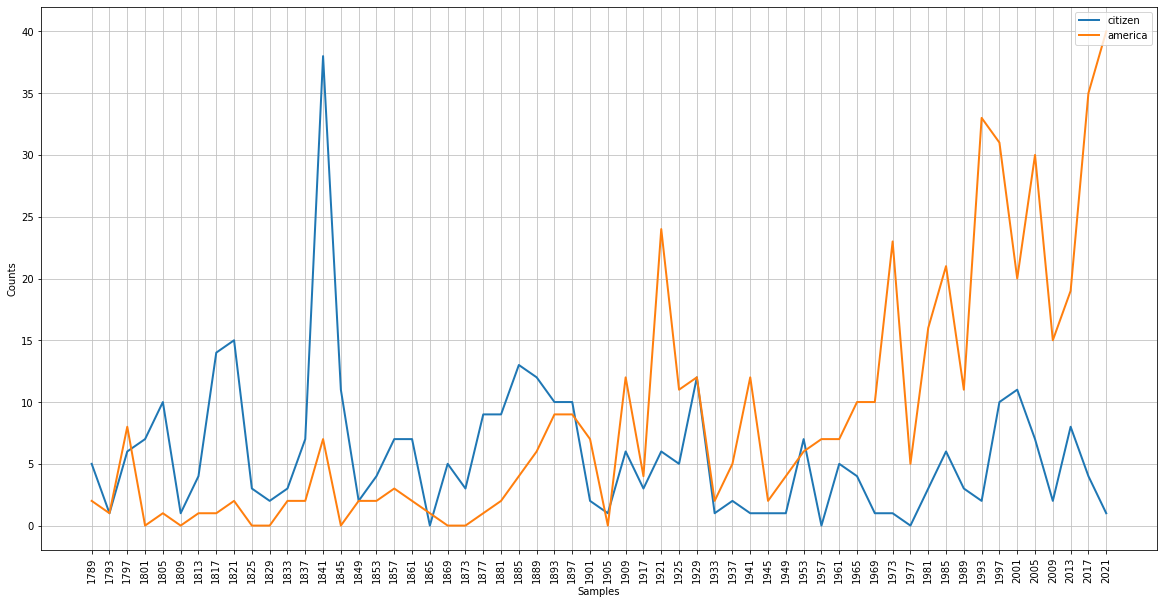

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [18]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [20, 10]

cfd = nltk.ConditionalFreqDist(
    (target, fileid[:4])
    for fileid in inaugural.fileids()
    for w in inaugural.words(fileid)
    for target in ['america', 'citizen']
    if w.lower().startswith(target))
cfd.plot()

### NLTK: Part-of-speech Tagging

-   take a look at Chapter 5 of the book
    (<http://www.nltk.org/book/ch05.html>)

-   go through the introductory part (5.1)

-   find the most common verbs in news text (5.2.5)

-   compare the three taggers that come with NLTK (5.4)




*The horse raced past the barn fell.*

### NLTK: Parsing

-   take a look at Chapter 8 of the book
    (<http://www.nltk.org/book/ch08.html>)

-   run the example of an ambiguous sentence (8.1.2)

-   load the toy CFG in Section 8.3.1

-   expand the toy CFG by some additional words and structures

-   start working through Section 8.5 on dependency grammar

# Classes

### Defining Classes

- a **class** is a user-defined datatype

- you can define which methods instances of that class have

- naming convention: start with a capital letter\
  (`City`, `Course`, `Grammar`, `Language`, `Movie`, `Student`,
  `Word`)

- template for defining a class `YourClass`:

  ```python
  class YourClass:
      variable1 = initial_val1
      variable2 = initial_val2
    
      def method1(self):
          statement1
    
      def method2(self):
          statement2
  ```




### Instance Variables

Data specific to each instance can be stored in **instance variables**:

- inside class definitions, you have access to the variable `self`

- `self` represents one object of the datatype you are defining

- variable declarations in the class body are **class variables**

- using `self.variable`, you model data assigned to a specific
  instance

- inside class methods, `self.variable` works like any variable:

  ```python
    self.name = "Uga Blamp"
    self.first_name = self.name.split(" ")[0]
    print(self.first_name)
  ```

### Constructors

The **constructor** is a special method of each class:

- the default constructor does not create any instance variables

- by defining a constructor `__init__(self)`, you can initialize
  variables for the instance you are creating:

  ```python
  class YourClass:
      def __init__(self):
          self.property1 = "initial_value"
          self.data_store = dict()
  ```

- constructors can have additional (also named) arguments:

  ```python
  class Language:
      def __init__(self,name,family="Unknown"):
          self.name = name
          self.family = family
  ```

In [19]:
class Language:
    def __init__(self, name_, family_="Unkown"):
        self.name = name_
        self.family = family_

### Instance Objects

Using a class definition to create instance objects:

-   instances are created by calling the class name like a function

-   instances you created can be assigned to variables like any other
    object, and calling `type()` on them will return your class object

-   the arguments of the constructor define in which ways you can create
    instances of your class (= objects of your type):

In [21]:
eus = Language("Basque")


In [22]:
eus.family


'Unkown'

In [23]:
eus.name

'Basque'

In [27]:
hun = Language("Hungarian",family_="Uralic")


In [28]:
hun.family


'Uralic'

In [29]:
kbd = Language("Kabardian","Northwest Caucasian")


In [30]:
kbd.family


'Northwest Caucasian'

### Defining Methods

Methods are functions declared inside a class body:

-   they must have `self` as the first argument:

In [31]:
class Language:
    def __init__(self,name,family="Unknown"):
        self.name = name
        self.family = family
        
    def print_information(self):
        print(self.name + " belongs to " + self.family)
        

- in method calls, the object before the dot is assigned to `self`:

In [32]:
hun = Language("Hungarian",family="Uralic")
hun.print_information()


Hungarian belongs to Uralic


In [34]:
type(hun)

__main__.Language

In [33]:
eus = Language("Basque")
eus.print_information()


Basque belongs to Unknown


### A Glimpse at Inheritance

Some quick info on a more advanced subject:

-   `class A(B):` declares A as a **subtype** of B

-   all functionality (class variables, methods) are **inherited**, but
    can be overridden by redefinition or reassignment in the subclass

-   these concepts are only relevant in advanced software engineering
    (which is typically not done in Python)

-   quite frequently, you see the idiom `class A(object)` in
    introductory materials, though

# Random Sampling

Often, we want to use random data in our programs:

-   only take a random subset of the input data for tractability

-   creating realistic-looking dummy data in order to test a program

-   simulating processes like language change, or a walk through the Web

-   re-sampling from a dataset to evaluate the stability of results on
    varying input (bootstrapping)

For all of this, we have the `random` library!

### The `random` library

Basic functionality of the `random` library:

-   `random.randint(a,b)` uniformly samples an integer
    $a \leq N \leq b$:

In [39]:
import random
[random.randint(1,6) for i in range(10)]


[3, 6, 2, 4, 3, 5, 6, 6, 4, 1]

- `random.random()` samples from the uniform distribution over the
interval $[0.0,1.0)$:

In [42]:
[random.random() for i in range(3)]


[0.3094435233707499, 0.332102019708195, 0.5129015244766963]

- `random.gauss(mu,sigma)` samples from a Gaussian with mean `mu` and
standard deviation `sigma`:

In [43]:
[random.gauss(2,0.5) for i in range(3)]


[2.460356026688593, 2.308768799301225, 1.4595790817798835]

### The `random` library

Sequence sampling using the `random` library:

-   `random.choice(seq)` samples from a uniform distribution over a
    sequence `seq` of possible values:

In [46]:
[random.choice(["a","b","c"]) for i in range(10)]


['b', 'a', 'a', 'c', 'c', 'c', 'b', 'c', 'a', 'a']

- `random.choices(seq,weights)` samples from a distribution over `seq`
provided by the `weight` list:

In [49]:
[random.choices(["a","b"],[0.7,0.3]) for i in range(8)]


[['a'], ['b'], ['a'], ['b'], ['a'], ['a'], ['a'], ['a']]

- `random.shuffle()` re-orders the sequence in place in a random way:

In [50]:
list = ["r","a","n","d","o","m"]

In [53]:
for i in range(3):
    random.shuffle(list); print("".join(list))

rmnado
mrnaod
ondarm


Much to cover in more advanced course: random seeds, other
distributions, ...

### Example: Generating random names

Assume that we have the following frequency statistics:

-   onsets: 25% k, 25% p, 15% l, 10% m, 10% n, 10% \"\", 5% w

-   vowels: 40% a, 20% i, 20% u, 10% e, 10% o

Here is a function which samples names from these distributions:

In [54]:
from random import choices

onset_options = ["k","p","l","m","n","","w"]
onset_weights = [25, 25, 15, 10, 10, 10, 5]
vowel_options = ["a","i","u","e","o"]
vowel_weights = [40, 20, 20, 10, 10]
 
def random_name(num_syllables):
    name = ""
    for i in range(num_syllables):
        name += choices(onset_options, onset_weights)[0]
        name += choices(vowel_options, vowel_weights)[0]
    return name.title()

In [59]:
random_name(3)

'Mukimi'